In [4]:
import pandas as pd

In [5]:
df_vehicles=pd.read_csv('../Motor_Vehicle_Collisions_-_Vehicles.csv')

/home/user-1711/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df_vehicles.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'VEHICLE_ID',
       'STATE_REGISTRATION', 'VEHICLE_TYPE', 'VEHICLE_MAKE', 'VEHICLE_MODEL',
       'VEHICLE_YEAR', 'TRAVEL_DIRECTION', 'VEHICLE_OCCUPANTS', 'DRIVER_SEX',
       'DRIVER_LICENSE_STATUS', 'DRIVER_LICENSE_JURISDICTION', 'PRE_CRASH',
       'POINT_OF_IMPACT', 'VEHICLE_DAMAGE', 'VEHICLE_DAMAGE_1',
       'VEHICLE_DAMAGE_2', 'VEHICLE_DAMAGE_3', 'PUBLIC_PROPERTY_DAMAGE',
       'PUBLIC_PROPERTY_DAMAGE_TYPE', 'CONTRIBUTING_FACTOR_1',
       'CONTRIBUTING_FACTOR_2'],
      dtype='object')

In [7]:
#df=df[['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4']]  #'NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED'
df_vehicles[['COLLISION_ID','CRASH_DATE','VEHICLE_TYPE', 'VEHICLE_MAKE', 'VEHICLE_MODEL',
       'VEHICLE_YEAR', 'TRAVEL_DIRECTION', 'VEHICLE_OCCUPANTS', 'DRIVER_SEX',
       'DRIVER_LICENSE_STATUS', 'DRIVER_LICENSE_JURISDICTION', 'PRE_CRASH',
       'POINT_OF_IMPACT']]

,COLLISION_ID,CRASH_DATE,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT
0,100201,09/07/2012,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4229438,10/18/2019,Sedan,HYUN -CAR/SUV,NaN,2015.0,West,0.0,NaN,NaN,NaN,Parked,Left Front Bumper
2,3307608,10/02/2015,TAXI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Going Straight Ahead,NaN
3,3308693,10/04/2015,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parked,NaN
4,297666,04/25/2013,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447888,4036313,11/30/2018,Station Wagon/Sport Utility Vehicle,CHEV -CAR/SUV,NaN,2015.0,West,1.0,M,Licensed,NY,Parked,Center Front End
3447889,4308748,04/11/2020,Station Wagon/Sport Utility Vehicle,DODG -CAR/SUV,NaN,2019.0,East,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Bumper
3447890,4281090,01/30/2020,Station Wagon/Sport Utility Vehicle,NISS -CAR/SUV,NaN,2004.0,East,1.0,M,Licensed,NY,Starting from Parking,Left Front Bumper
3447891,4308976,04/15/2020,NaN,DODG -CAR/SUV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_crash_by_type=df_vehicles.groupby(by=['PRE_CRASH']).count().sort_values(by=['COLLISION_ID'],ascending=False)[['COLLISION_ID']]
df_crash_by_type

,COLLISION_ID
PRE_CRASH,
Going Straight Ahead,1251443
Parked,413327
Making Left Turn,157787
Making Right Turn,135201
Stopped in Traffic,125790
Slowing or Stopping,100811
Backing,95790
Changing Lanes,81691
Starting from Parking,46387


<AxesSubplot:ylabel='PRE_CRASH'>

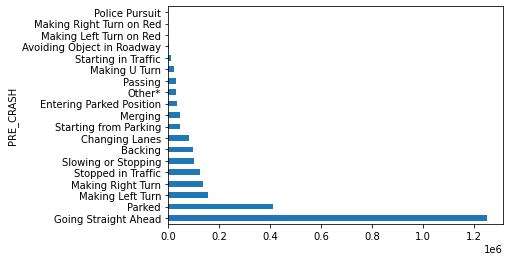

In [9]:
df_crash_by_type.plot(kind='barh')

In [10]:
import pandas as pd
df_crashes=pd.read_csv('../Motor_Vehicle_Collisions_-_Crashes.csv')

/home/user-1711/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
df_crashes['SEVERITY']=df_crashes['NUMBER OF PERSONS INJURED']+4*df_crashes['NUMBER OF PERSONS KILLED']
df_crashes['SEVERITY']

0          1.0
1          0.0
2          0.0
3          0.0
4          1.0
          ... 
1720017    0.0
1720018    0.0
1720019    0.0
1720020    1.0
1720021    0.0
Name: SEVERITY, Length: 1720022, dtype: float64

In [12]:
df_crashes=df_crashes[['COLLISION_ID','SEVERITY']]

In [13]:
df_crashes.dropna(inplace=True)

In [14]:
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1719986 entries, 0 to 1720021
Data columns (total 2 columns):
 #   Column        Dtype  
---  ------        -----  
 0   COLLISION_ID  int64  
 1   SEVERITY      float64
dtypes: float64(1), int64(1)
memory usage: 39.4 MB


In [15]:
df_merged=pd.merge(df_vehicles,df_crashes,on='COLLISION_ID')

In [16]:
df_merged['PRE_CRASH'].dropna(inplace=True)

In [17]:
df_merged

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,SEVERITY
0,10385780,100201,09/07/2012,9:03,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN,0.0
1,10385782,100201,09/07/2012,9:03,3,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN,0.0
2,10385781,100201,09/07/2012,9:03,2,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN,0.0
3,19140121,4229438,10/18/2019,18:00,52ae0029-b174-40c9-9ef5-abdd5fdb2704,NJ,Sedan,HYUN -CAR/SUV,NaN,2015.0,...,Left Front Bumper,Left Front Bumper,No Damage,No Damage,No Damage,N,NaN,Unspecified,Unspecified,0.0
4,19140122,4229438,10/18/2019,18:00,6dd1400f-5cde-4a6d-9ff8-6c4bf27c7fee,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3442632,19594610,4304021,03/26/2020,14:05,b8831509-4d2e-42ac-a315-666f18462e51,NY,Station Wagon/Sport Utility Vehicle,HOND -CAR/SUV,NaN,2017.0,...,Center Front End,Demolished,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,1.0
3442633,19632202,4257420,12/10/2019,20:00,397140ef-c401-4ddb-8b9d-f7de64c8f78f,NY,Taxi,TOYT -CAR/SUV,NaN,2017.0,...,Right Front Bumper,Right Front Bumper,No Damage,No Damage,No Damage,N,NaN,Driver Inattention/Distraction,Unspecified,1.0
3442634,19544947,4292199,02/21/2020,18:00,1ef6a4c9-f20a-4f80-9470-8c359c5387ea,NY,Taxi,TOYT -CAR/SUV,NaN,2016.0,...,Center Front End,No Damage,No Damage,No Damage,No Damage,N,NaN,Driver Inattention/Distraction,Unspecified,0.0
3442635,19529157,4271440,01/10/2020,13:28,b317d0cd-2d58-4b05-8e36-e8ed919740ca,NaN,Bike,NaN,NaN,NaN,...,Center Front End,Center Front End,No Damage,No Damage,No Damage,N,NaN,Unspecified,Unspecified,1.0


In [18]:
df_severity=df_merged.groupby(['PRE_CRASH']).mean()[['SEVERITY']]
df_severity.sort_values(by=['SEVERITY'],ascending=False)

,SEVERITY
PRE_CRASH,
Police Pursuit,0.506079
Making Left Turn,0.397815
Making Left Turn on Red,0.396594
Stopped in Traffic,0.375723
Slowing or Stopping,0.371858
Going Straight Ahead,0.349398
Making U Turn,0.321229
Avoiding Object in Roadway,0.303306
Starting in Traffic,0.300349


In [26]:
df_risk=df_crash_by_type.join(df_severity)
df_risk.rename(columns={'COLLISION_ID':'NUMBER_OF_COLLISIONS'},inplace=True)
df_risk['LOSS']=df_risk['NUMBER_OF_COLLISIONS']*df_risk['SEVERITY']
df_risk.sort_values(by=['LOSS'],ascending=False,inplace=True)
df_risk

,NUMBER_OF_COLLISIONS,SEVERITY,LOSS
PRE_CRASH,,,
Going Straight Ahead,1251443,0.349398,437251.687755
Making Left Turn,157787,0.397815,62769.979359
Parked,413327,0.138493,57242.988160
Stopped in Traffic,125790,0.375723,47262.150308
Slowing or Stopping,100811,0.371858,37487.341494
Making Right Turn,135201,0.193636,26179.758988
Changing Lanes,81691,0.167998,13723.959851
Backing,95790,0.100636,9639.956636
Other*,30423,0.268053,8154.969372


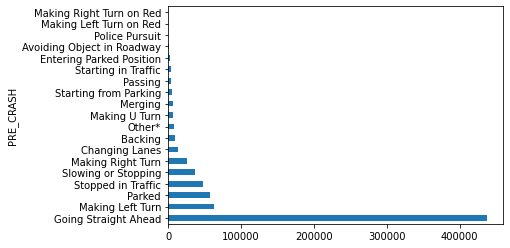

In [30]:
df_risk['LOSS'].plot(kind='barh');